# `hashlib` --- Secure hashes and message digests

hashlib

Gregory P. Smith \<<greg@krypto.org>\>

Gregory P. Smith \<<greg@krypto.org>\>

**Source code:** `Lib/hashlib.py`

single: message digest, MD5 single: secure hash algorithm, SHA1, SHA224,
SHA256, SHA384, SHA512

import hashlib

------------------------------------------------------------------------

This module implements a common interface to many different secure hash
and message digest algorithms. Included are the FIPS secure hash
algorithms SHA1, SHA224, SHA256, SHA384, and SHA512 (defined in FIPS
180-2) as well as RSA's MD5 algorithm (defined in internet `1321`). The
terms "secure hash" and "message digest" are interchangeable. Older
algorithms were called message digests. The modern term is secure hash.

Note

If you want the adler32 or crc32 hash functions, they are available in
the `zlib` module.

Warning

Some algorithms have known hash collision weaknesses, refer to the "See
also" section at the end.

## Hash algorithms

There is one constructor method named for each type of `hash`. All
return a hash object with the same simple interface. For example: use
`sha256` to create a SHA-256 hash object. You can now feed this object
with `bytes-like
objects <bytes-like object>` (normally `bytes`) using the `update`
method. At any point you can ask it for the `digest` of the
concatenation of the data fed to it so far using the `digest` or
`hexdigest` methods.

Note

For better multithreading performance, the Python `GIL` is released for
data larger than 2047 bytes at object creation or on update.

Note

Feeding string objects into `update` is not supported, as hashes work on
bytes, not on characters.

single: OpenSSL; (use in module hashlib)

Constructors for hash algorithms that are always present in this module
are `sha1`, `sha224`, `sha256`, `sha384`, `sha512`, `blake2b`, and
`blake2s`. `md5` is normally available as well, though it may be missing
or blocked if you are using a rare "FIPS compliant" build of Python.
Additional algorithms may also be available depending upon the OpenSSL
library that Python uses on your platform. On most platforms the
`sha3_224`, `sha3_256`, `sha3_384`, `sha3_512`, `shake_128`, `shake_256`
are also available.

3.6 SHA3 (Keccak) and SHAKE constructors `sha3_224`, `sha3_256`,
`sha3_384`, `sha3_512`, `shake_128`, `shake_256`.

3.6 `blake2b` and `blake2s` were added.

3.9 All hashlib constructors take a keyword-only argument
*usedforsecurity* with default value `True`. A false value allows the
use of insecure and blocked hashing algorithms in restricted
environments. `False` indicates that the hashing algorithm is not used
in a security context, e.g. as a non-cryptographic one-way compression
function.

Hashlib now uses SHA3 and SHAKE from OpenSSL 1.1.1 and newer.

For example, to obtain the digest of the byte string
`b"Nobody inspects the spammish repetition"`:

    >>> import hashlib
    >>> m = hashlib.sha256()
    >>> m.update(b"Nobody inspects")
    >>> m.update(b" the spammish repetition")
    >>> m.digest()
    b'\x03\x1e\xdd}Ae\x15\x93\xc5\xfe\\\x00o\xa5u+7\xfd\xdf\xf7\xbcN\x84:\xa6\xaf\x0c\x95\x0fK\x94\x06'
    >>> m.hexdigest()
    '031edd7d41651593c5fe5c006fa5752b37fddff7bc4e843aa6af0c950f4b9406'

More condensed:

> \>\>\> hashlib.sha256(b"Nobody inspects the spammish
> repetition").hexdigest()
> '031edd7d41651593c5fe5c006fa5752b37fddff7bc4e843aa6af0c950f4b9406'

new(name\[, data\], \*, usedforsecurity=True)

Is a generic constructor that takes the string *name* of the desired
algorithm as its first parameter. It also exists to allow access to the
above listed hashes as well as any other algorithms that your OpenSSL
library may offer. The named constructors are much faster than `new` and
should be preferred.

Using `new` with an algorithm provided by OpenSSL:

> \>\>\> h = hashlib.new('sha256') \>\>\> h.update(b"Nobody inspects the
> spammish repetition") \>\>\> h.hexdigest()
> '031edd7d41651593c5fe5c006fa5752b37fddff7bc4e843aa6af0c950f4b9406'

Hashlib provides the following constant attributes:

algorithms_guaranteed

A set containing the names of the hash algorithms guaranteed to be
supported by this module on all platforms. Note that 'md5' is in this
list despite some upstream vendors offering an odd "FIPS compliant"
Python build that excludes it.

3.2

algorithms_available

A set containing the names of the hash algorithms that are available in
the running Python interpreter. These names will be recognized when
passed to `new`. `algorithms_guaranteed` will always be a subset. The
same algorithm may appear multiple times in this set under different
names (thanks to OpenSSL).

3.2

The following values are provided as constant attributes of the hash
objects returned by the constructors:

hash.digest_size

The size of the resulting hash in bytes.

hash.block_size

The internal block size of the hash algorithm in bytes.

A hash object has the following attributes:

hash.name

The canonical name of this hash, always lowercase and always suitable as
a parameter to `new` to create another hash of this type.

3.4 The name attribute has been present in CPython since its inception,
but until Python 3.4 was not formally specified, so may not exist on
some platforms.

A hash object has the following methods:

hash.update(data)

Update the hash object with the `bytes-like object`. Repeated calls are
equivalent to a single call with the concatenation of all the arguments:
`m.update(a); m.update(b)` is equivalent to `m.update(a+b)`.

3.1 The Python GIL is released to allow other threads to run while hash
updates on data larger than 2047 bytes is taking place when using hash
algorithms supplied by OpenSSL.

hash.digest()

Return the digest of the data passed to the `update` method so far. This
is a bytes object of size `digest_size` which may contain bytes in the
whole range from 0 to 255.

hash.hexdigest()

Like `digest` except the digest is returned as a string object of double
length, containing only hexadecimal digits. This may be used to exchange
the value safely in email or other non-binary environments.

hash.copy()

Return a copy ("clone") of the hash object. This can be used to
efficiently compute the digests of data sharing a common initial
substring.

## SHAKE variable length digests

The `shake_128` and `shake_256` algorithms provide variable length
digests with length_in_bits//2 up to 128 or 256 bits of security. As
such, their digest methods require a length. Maximum length is not
limited by the SHAKE algorithm.

shake.digest(length)

Return the digest of the data passed to the `update` method so far. This
is a bytes object of size *length* which may contain bytes in the whole
range from 0 to 255.

shake.hexdigest(length)

Like `digest` except the digest is returned as a string object of double
length, containing only hexadecimal digits. This may be used to exchange
the value safely in email or other non-binary environments.

## File hashing

The hashlib module provides a helper function for efficient hashing of a
file or file-like object.

file_digest(fileobj, digest, /)

Return a digest object that has been updated with contents of file
object.

*fileobj* must be a file-like object opened for reading in binary mode.
It accepts file objects from builtin `open`, `~io.BytesIO` instances,
SocketIO objects from `socket.socket.makefile`, and similar. The
function may bypass Python's I/O and use the file descriptor from
`~io.IOBase.fileno` directly. *fileobj* must be assumed to be in an
unknown state after this function returns or raises. It is up to the
caller to close *fileobj*.

*digest* must either be a hash algorithm name as a *str*, a hash
constructor, or a callable that returns a hash object.

Example:

> \>\>\> import io, hashlib, hmac \>\>\> with open(hashlib.\_\_file\_\_,
> "rb") as f: ... digest = hashlib.file_digest(f, "sha256") ... \>\>\>
> digest.hexdigest() \# doctest: +ELLIPSIS '...'
>
> \>\>\> buf = io.BytesIO(b"somedata") \>\>\> mac1 = hmac.HMAC(b"key",
> digestmod=hashlib.sha512) \>\>\> digest = hashlib.file_digest(buf,
> lambda: mac1)
>
> \>\>\> digest is mac1 True \>\>\> mac2 = hmac.HMAC(b"key",
> b"somedata", digestmod=hashlib.sha512) \>\>\> mac1.digest() ==
> mac2.digest() True

3.11

## Key derivation

Key derivation and key stretching algorithms are designed for secure
password hashing. Naive algorithms such as `sha1(password)` are not
resistant against brute-force attacks. A good password hashing function
must be tunable, slow, and include a
[salt](https://en.wikipedia.org/wiki/Salt_%28cryptography%29).

pbkdf2_hmac(hash_name, password, salt, iterations, dklen=None)

The function provides PKCS#5 password-based key derivation function 2.
It uses HMAC as pseudorandom function.

The string *hash_name* is the desired name of the hash digest algorithm
for HMAC, e.g. 'sha1' or 'sha256'. *password* and *salt* are interpreted
as buffers of bytes. Applications and libraries should limit *password*
to a sensible length (e.g. 1024). *salt* should be about 16 or more
bytes from a proper source, e.g. `os.urandom`.

The number of *iterations* should be chosen based on the hash algorithm
and computing power. As of 2022, hundreds of thousands of iterations of
SHA-256 are suggested. For rationale as to why and how to choose what is
best for your application, read *Appendix A.2.2* of
[NIST-SP-800-132](https://nvlpubs.nist.gov/nistpubs/Legacy/SP/nistspecialpublication800-132.pdf).
The answers on the [stackexchange pbkdf2 iterations
question](https://security.stackexchange.com/questions/3959/recommended-of-iterations-when-using-pbkdf2-sha256/)
explain in detail.

*dklen* is the length of the derived key. If *dklen* is `None` then the
digest size of the hash algorithm *hash_name* is used, e.g. 64 for
SHA-512.

\>\>\> from hashlib import pbkdf2_hmac \>\>\> our_app_iters = 500_000 \#
Application specific, read above. \>\>\> dk = pbkdf2_hmac('sha256',
b'password', b'bad salt'\*2, our_app_iters) \>\>\> dk.hex()
'15530bba69924174860db778f2c6f8104d3aaf9d26241840c8c4a641c8d000a9'

3.4

Note

A fast implementation of *pbkdf2_hmac* is available with OpenSSL. The
Python implementation uses an inline version of `hmac`. It is about
three times slower and doesn't release the GIL.

3.10

Slow Python implementation of *pbkdf2_hmac* is deprecated. In the future
the function will only be available when Python is compiled with
OpenSSL.

scrypt(password, \*, salt, n, r, p, maxmem=0, dklen=64)

The function provides scrypt password-based key derivation function as
defined in `7914`.

*password* and *salt* must be `bytes-like objects
<bytes-like object>`. Applications and libraries should limit *password*
to a sensible length (e.g. 1024). *salt* should be about 16 or more
bytes from a proper source, e.g. `os.urandom`.

*n* is the CPU/Memory cost factor, *r* the block size, *p*
parallelization factor and *maxmem* limits memory (OpenSSL 1.1.0
defaults to 32 MiB). *dklen* is the length of the derived key.

3.6

## BLAKE2

Dmitry Chestnykh

single: blake2b, blake2s

[BLAKE2](https://blake2.net) is a cryptographic hash function defined in
`7693` that comes in two flavors:

-   **BLAKE2b**, optimized for 64-bit platforms and produces digests of
    any size between 1 and 64 bytes,
-   **BLAKE2s**, optimized for 8- to 32-bit platforms and produces
    digests of any size between 1 and 32 bytes.

BLAKE2 supports **keyed mode** (a faster and simpler replacement for
[HMAC](https://en.wikipedia.org/wiki/Hash-based_message_authentication_code)),
**salted hashing**, **personalization**, and **tree hashing**.

Hash objects from this module follow the API of standard library's
`hashlib` objects.

### Creating hash objects

New hash objects are created by calling constructor functions:

blake2b(data=b'', \*, digest_size=64, key=b'', salt=b'', person=b'',
fanout=1, depth=1, leaf_size=0, node_offset=0, node_depth=0,
inner_size=0, last_node=False, usedforsecurity=True)

blake2s(data=b'', \*, digest_size=32, key=b'', salt=b'', person=b'',
fanout=1, depth=1, leaf_size=0, node_offset=0, node_depth=0,
inner_size=0, last_node=False, usedforsecurity=True)

These functions return the corresponding hash objects for calculating
BLAKE2b or BLAKE2s. They optionally take these general parameters:

-   *data*: initial chunk of data to hash, which must be
    `bytes-like object`. It can be passed only as positional argument.
-   *digest_size*: size of output digest in bytes.
-   *key*: key for keyed hashing (up to 64 bytes for BLAKE2b, up to 32
    bytes for BLAKE2s).
-   *salt*: salt for randomized hashing (up to 16 bytes for BLAKE2b, up
    to 8 bytes for BLAKE2s).
-   *person*: personalization string (up to 16 bytes for BLAKE2b, up to
    8 bytes for BLAKE2s).

The following table shows limits for general parameters (in bytes):

<table>
<thead>
<tr class="header">
<th>Hash</th>
<th>digest_size</th>
<th>len(key)</th>
<th>len(salt)</th>
<th>len(person)</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td>BLAKE2b</td>
<td><blockquote>
<p>64</p>
</blockquote></td>
<td><blockquote>
<p>64</p>
</blockquote></td>
<td><blockquote>
<p>16</p>
</blockquote></td>
<td><blockquote>
<p>16</p>
</blockquote></td>
</tr>
<tr class="even">
<td>BLAKE2s</td>
<td><blockquote>
<p>32</p>
</blockquote></td>
<td><blockquote>
<p>32</p>
</blockquote></td>
<td><blockquote>
<p>8</p>
</blockquote></td>
<td><blockquote>
<p>8</p>
</blockquote></td>
</tr>
</tbody>
</table>

Note

BLAKE2 specification defines constant lengths for salt and
personalization parameters, however, for convenience, this
implementation accepts byte strings of any size up to the specified
length. If the length of the parameter is less than specified, it is
padded with zeros, thus, for example, `b'salt'` and `b'salt\x00'` is the
same value. (This is not the case for *key*.)

These sizes are available as module [constants](#constants) described
below.

Constructor functions also accept the following tree hashing parameters:

-   *fanout*: fanout (0 to 255, 0 if unlimited, 1 in sequential mode).
-   *depth*: maximal depth of tree (1 to 255, 255 if unlimited, 1 in
    sequential mode).
-   *leaf_size*: maximal byte length of leaf (0 to `2**32-1`, 0 if
    unlimited or in sequential mode).
-   *node_offset*: node offset (0 to `2**64-1` for BLAKE2b, 0 to
    `2**48-1` for BLAKE2s, 0 for the first, leftmost, leaf, or in
    sequential mode).
-   *node_depth*: node depth (0 to 255, 0 for leaves, or in sequential
    mode).
-   *inner_size*: inner digest size (0 to 64 for BLAKE2b, 0 to 32 for
    BLAKE2s, 0 in sequential mode).
-   *last_node*: boolean indicating whether the processed node is the
    last one (<span class="title-ref">False</span> for sequential mode).

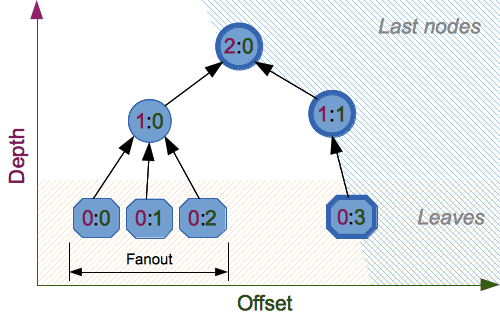

See section 2.10 in [BLAKE2
specification](https://blake2.net/blake2_20130129.pdf) for comprehensive
review of tree hashing.

### Constants

blake2b.SALT_SIZE

blake2s.SALT_SIZE

Salt length (maximum length accepted by constructors).

blake2b.PERSON_SIZE

blake2s.PERSON_SIZE

Personalization string length (maximum length accepted by constructors).

blake2b.MAX_KEY_SIZE

blake2s.MAX_KEY_SIZE

Maximum key size.

blake2b.MAX_DIGEST_SIZE

blake2s.MAX_DIGEST_SIZE

Maximum digest size that the hash function can output.

### Examples

#### Simple hashing

To calculate hash of some data, you should first construct a hash object
by calling the appropriate constructor function (`blake2b` or
`blake2s`), then update it with the data by calling `update` on the
object, and, finally, get the digest out of the object by calling
`digest` (or `hexdigest` for hex-encoded string).

> \>\>\> from hashlib import blake2b \>\>\> h = blake2b() \>\>\>
> h.update(b'Hello world') \>\>\> h.hexdigest()
> '6ff843ba685842aa82031d3f53c48b66326df7639a63d128974c5c14f31a0f33343a8c65551134ed1ae0f2b0dd2bb495dc81039e3eeb0aa1bb0388bbeac29183'

As a shortcut, you can pass the first chunk of data to update directly
to the constructor as the positional argument:

> \>\>\> from hashlib import blake2b \>\>\> blake2b(b'Hello
> world').hexdigest()
> '6ff843ba685842aa82031d3f53c48b66326df7639a63d128974c5c14f31a0f33343a8c65551134ed1ae0f2b0dd2bb495dc81039e3eeb0aa1bb0388bbeac29183'

You can call `hash.update` as many times as you need to iteratively
update the hash:

> \>\>\> from hashlib import blake2b \>\>\> items = \[b'Hello', b' ',
> b'world'\] \>\>\> h = blake2b() \>\>\> for item in items: ...
> h.update(item) \>\>\> h.hexdigest()
> '6ff843ba685842aa82031d3f53c48b66326df7639a63d128974c5c14f31a0f33343a8c65551134ed1ae0f2b0dd2bb495dc81039e3eeb0aa1bb0388bbeac29183'

#### Using different digest sizes

BLAKE2 has configurable size of digests up to 64 bytes for BLAKE2b and
up to 32 bytes for BLAKE2s. For example, to replace SHA-1 with BLAKE2b
without changing the size of output, we can tell BLAKE2b to produce
20-byte digests:

> \>\>\> from hashlib import blake2b \>\>\> h = blake2b(digest_size=20)
> \>\>\> h.update(b'Replacing SHA1 with the more secure function')
> \>\>\> h.hexdigest() 'd24f26cf8de66472d58d4e1b1774b4c9158b1f4c' \>\>\>
> h.digest_size 20 \>\>\> len(h.digest()) 20

Hash objects with different digest sizes have completely different
outputs (shorter hashes are *not* prefixes of longer hashes); BLAKE2b
and BLAKE2s produce different outputs even if the output length is the
same:

> \>\>\> from hashlib import blake2b, blake2s \>\>\>
> blake2b(digest_size=10).hexdigest() '6fa1d8fcfd719046d762' \>\>\>
> blake2b(digest_size=11).hexdigest() 'eb6ec15daf9546254f0809' \>\>\>
> blake2s(digest_size=10).hexdigest() '1bf21a98c78a1c376ae9' \>\>\>
> blake2s(digest_size=11).hexdigest() '567004bf96e4a25773ebf4'

#### Keyed hashing

Keyed hashing can be used for authentication as a faster and simpler
replacement for [Hash-based message authentication
code](https://en.wikipedia.org/wiki/HMAC) (HMAC). BLAKE2 can be securely
used in prefix-MAC mode thanks to the indifferentiability property
inherited from BLAKE.

This example shows how to get a (hex-encoded) 128-bit authentication
code for message `b'message data'` with key `b'pseudorandom key'`:

    >>> from hashlib import blake2b
    >>> h = blake2b(key=b'pseudorandom key', digest_size=16)
    >>> h.update(b'message data')
    >>> h.hexdigest()
    '3d363ff7401e02026f4a4687d4863ced'

As a practical example, a web application can symmetrically sign cookies
sent to users and later verify them to make sure they weren't tampered
with:

    >>> from hashlib import blake2b
    >>> from hmac import compare_digest
    >>>
    >>> SECRET_KEY = b'pseudorandomly generated server secret key'
    >>> AUTH_SIZE = 16
    >>>
    >>> def sign(cookie):
    ...     h = blake2b(digest_size=AUTH_SIZE, key=SECRET_KEY)
    ...     h.update(cookie)
    ...     return h.hexdigest().encode('utf-8')
    >>>
    >>> def verify(cookie, sig):
    ...     good_sig = sign(cookie)
    ...     return compare_digest(good_sig, sig)
    >>>
    >>> cookie = b'user-alice'
    >>> sig = sign(cookie)
    >>> print("{0},{1}".format(cookie.decode('utf-8'), sig))
    user-alice,b'43b3c982cf697e0c5ab22172d1ca7421'
    >>> verify(cookie, sig)
    True
    >>> verify(b'user-bob', sig)
    False
    >>> verify(cookie, b'0102030405060708090a0b0c0d0e0f00')
    False

Even though there's a native keyed hashing mode, BLAKE2 can, of course,
be used in HMAC construction with `hmac` module:

    >>> import hmac, hashlib
    >>> m = hmac.new(b'secret key', digestmod=hashlib.blake2s)
    >>> m.update(b'message')
    >>> m.hexdigest()
    'e3c8102868d28b5ff85fc35dda07329970d1a01e273c37481326fe0c861c8142'

#### Randomized hashing

By setting *salt* parameter users can introduce randomization to the
hash function. Randomized hashing is useful for protecting against
collision attacks on the hash function used in digital signatures.

> Randomized hashing is designed for situations where one party, the
> message preparer, generates all or part of a message to be signed by a
> second party, the message signer. If the message preparer is able to
> find cryptographic hash function collisions (i.e., two messages
> producing the same hash value), then they might prepare meaningful
> versions of the message that would produce the same hash value and
> digital signature, but with different results (e.g., transferring
> \$1,000,000 to an account, rather than \$10). Cryptographic hash
> functions have been designed with collision resistance as a major
> goal, but the current concentration on attacking cryptographic hash
> functions may result in a given cryptographic hash function providing
> less collision resistance than expected. Randomized hashing offers the
> signer additional protection by reducing the likelihood that a
> preparer can generate two or more messages that ultimately yield the
> same hash value during the digital signature generation process ---
> even if it is practical to find collisions for the hash function.
> However, the use of randomized hashing may reduce the amount of
> security provided by a digital signature when all portions of the
> message are prepared by the signer.
>
> ([NIST SP-800-106 "Randomized Hashing for Digital
> Signatures"](https://csrc.nist.gov/publications/detail/sp/800-106/final))

In BLAKE2 the salt is processed as a one-time input to the hash function
during initialization, rather than as an input to each compression
function.

Warning

*Salted hashing* (or just hashing) with BLAKE2 or any other
general-purpose cryptographic hash function, such as SHA-256, is not
suitable for hashing passwords. See [BLAKE2 FAQ](https://blake2.net/#qa)
for more information.

> \>\>\> import os \>\>\> from hashlib import blake2b \>\>\> msg =
> b'some message' \>\>\> \# Calculate the first hash with a random salt.
> \>\>\> salt1 = os.urandom(blake2b.SALT_SIZE) \>\>\> h1 =
> blake2b(salt=salt1) \>\>\> h1.update(msg) \>\>\> \# Calculate the
> second hash with a different random salt. \>\>\> salt2 =
> os.urandom(blake2b.SALT_SIZE) \>\>\> h2 = blake2b(salt=salt2) \>\>\>
> h2.update(msg) \>\>\> \# The digests are different. \>\>\> h1.digest()
> != h2.digest() True

#### Personalization

Sometimes it is useful to force hash function to produce different
digests for the same input for different purposes. Quoting the authors
of the Skein hash function:

> We recommend that all application designers seriously consider doing
> this; we have seen many protocols where a hash that is computed in one
> part of the protocol can be used in an entirely different part because
> two hash computations were done on similar or related data, and the
> attacker can force the application to make the hash inputs the same.
> Personalizing each hash function used in the protocol summarily stops
> this type of attack.
>
> ([The Skein Hash Function
> Family](http://www.skein-hash.info/sites/default/files/skein1.3.pdf),
> p. 21)

BLAKE2 can be personalized by passing bytes to the *person* argument:

    >>> from hashlib import blake2b
    >>> FILES_HASH_PERSON = b'MyApp Files Hash'
    >>> BLOCK_HASH_PERSON = b'MyApp Block Hash'
    >>> h = blake2b(digest_size=32, person=FILES_HASH_PERSON)
    >>> h.update(b'the same content')
    >>> h.hexdigest()
    '20d9cd024d4fb086aae819a1432dd2466de12947831b75c5a30cf2676095d3b4'
    >>> h = blake2b(digest_size=32, person=BLOCK_HASH_PERSON)
    >>> h.update(b'the same content')
    >>> h.hexdigest()
    'cf68fb5761b9c44e7878bfb2c4c9aea52264a80b75005e65619778de59f383a3'

Personalization together with the keyed mode can also be used to derive
different keys from a single one.

> \>\>\> from hashlib import blake2s \>\>\> from base64 import
> b64decode, b64encode \>\>\> orig_key =
> b64decode(b'Rm5EPJai72qcK3RGBpW3vPNfZy5OZothY+kHY6h21KM=') \>\>\>
> enc_key = blake2s(key=orig_key, person=b'kEncrypt').digest() \>\>\>
> mac_key = blake2s(key=orig_key, person=b'kMAC').digest() \>\>\>
> print(b64encode(enc_key).decode('utf-8'))
> rbPb15S/Z9t+agffno5wuhB77VbRi6F9Iv2qIxU7WHw= \>\>\>
> print(b64encode(mac_key).decode('utf-8'))
> G9GtHFE1YluXY1zWPlYk1e/nWfu0WSEb0KRcjhDeP/o=

#### Tree mode

Here's an example of hashing a minimal tree with two leaf nodes:

    10
    /  \
    00  01

This example uses 64-byte internal digests, and returns the 32-byte
final digest:

    >>> from hashlib import blake2b
    >>>
    >>> FANOUT = 2
    >>> DEPTH = 2
    >>> LEAF_SIZE = 4096
    >>> INNER_SIZE = 64
    >>>
    >>> buf = bytearray(6000)
    >>>
    >>> # Left leaf
    ... h00 = blake2b(buf[0:LEAF_SIZE], fanout=FANOUT, depth=DEPTH,
    ...               leaf_size=LEAF_SIZE, inner_size=INNER_SIZE,
    ...               node_offset=0, node_depth=0, last_node=False)
    >>> # Right leaf
    ... h01 = blake2b(buf[LEAF_SIZE:], fanout=FANOUT, depth=DEPTH,
    ...               leaf_size=LEAF_SIZE, inner_size=INNER_SIZE,
    ...               node_offset=1, node_depth=0, last_node=True)
    >>> # Root node
    ... h10 = blake2b(digest_size=32, fanout=FANOUT, depth=DEPTH,
    ...               leaf_size=LEAF_SIZE, inner_size=INNER_SIZE,
    ...               node_offset=0, node_depth=1, last_node=True)
    >>> h10.update(h00.digest())
    >>> h10.update(h01.digest())
    >>> h10.hexdigest()
    '3ad2a9b37c6070e374c7a8c508fe20ca86b6ed54e286e93a0318e95e881db5aa'

### Credits

[BLAKE2](https://blake2.net) was designed by *Jean-Philippe Aumasson*,
*Samuel Neves*, *Zooko Wilcox-O'Hearn*, and *Christian Winnerlein* based
on [SHA-3](https://en.wikipedia.org/wiki/NIST_hash_function_competition)
finalist [BLAKE](https://131002.net/blake/) created by *Jean-Philippe
Aumasson*, *Luca Henzen*, *Willi Meier*, and *Raphael C.-W. Phan*.

It uses core algorithm from [ChaCha](https://cr.yp.to/chacha.html)
cipher designed by *Daniel J. Bernstein*.

The stdlib implementation is based on
[pyblake2](https://pythonhosted.org/pyblake2/) module. It was written by
*Dmitry Chestnykh* based on C implementation written by *Samuel Neves*.
The documentation was copied from
[pyblake2](https://pythonhosted.org/pyblake2/) and written by *Dmitry
Chestnykh*.

The C code was partly rewritten for Python by *Christian Heimes*.

The following public domain dedication applies for both C hash function
implementation, extension code, and this documentation:

> To the extent possible under law, the author(s) have dedicated all
> copyright and related and neighboring rights to this software to the
> public domain worldwide. This software is distributed without any
> warranty.
>
> You should have received a copy of the CC0 Public Domain Dedication
> along with this software. If not, see
> <https://creativecommons.org/publicdomain/zero/1.0/>.

The following people have helped with development or contributed their
changes to the project and the public domain according to the Creative
Commons Public Domain Dedication 1.0 Universal:

-   *Alexandr Sokolovskiy*

Module `hmac`  
A module to generate message authentication codes using hashes.

Module `base64`  
Another way to encode binary hashes for non-binary environments.

<https://blake2.net>  
Official BLAKE2 website.

<https://csrc.nist.gov/csrc/media/publications/fips/180/2/archive/2002-08-01/documents/fips180-2.pdf>  
The FIPS 180-2 publication on Secure Hash Algorithms.

<https://en.wikipedia.org/wiki/Cryptographic_hash_function#Cryptographic_hash_algorithms>  
Wikipedia article with information on which algorithms have known issues
and what that means regarding their use.

<https://www.ietf.org/rfc/rfc8018.txt>  
PKCS #5: Password-Based Cryptography Specification Version 2.1

<https://nvlpubs.nist.gov/nistpubs/Legacy/SP/nistspecialpublication800-132.pdf>  
NIST Recommendation for Password-Based Key Derivation.